In [ ]:
#1 BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn import metrics

In [ ]:
#2 IMPORTANDO ARQUIVO
dados=pd.read_csv('insurance.csv')

In [ ]:
#3 ANALISANDO OS DADOS I (ANÁLISE EXPLORATÓRIA DOS DADOS - AED)
print(dados.head())
print(dados.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)


In [ ]:
#4 ANALISANDO OS DADOS II - AED
print(dados.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
#5 ANALISANDO OS DADOS III - AED
dados.describe().round(2)


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [ ]:
#6 PRÉ PROCESSSANDO OS DADOS I
#Convertendo as variáveis SEX, SMOKER e REGION em numéricas (ENCODING)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#sex
le.fit(dados.sex)
dados.sex = le.transform(dados.sex)

# smoker
le.fit(dados.smoker)
dados.smoker = le.transform(dados.smoker)

#region
le.fit(dados.region)
dados.region = le.transform(dados.region)

print(dados.head())
print(dados.shape)

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
(1338, 7)


In [ ]:
#7 ANALISANDO OS DADOS IV - AED
#CORRELAÇÕES
dados.corr().round(2)

,age,sex,bmi,children,smoker,region,charges
age,1.00,-0.02,0.11,0.04,-0.03,0.00,0.30
sex,-0.02,1.00,0.05,0.02,0.08,0.00,0.06
bmi,0.11,0.05,1.00,0.01,0.00,0.16,0.20
children,0.04,0.02,0.01,1.00,0.01,0.02,0.07
smoker,-0.03,0.08,0.00,0.01,1.00,-0.00,0.79
region,0.00,0.00,0.16,0.02,-0.00,1.00,-0.01
charges,0.30,0.06,0.20,0.07,0.79,-0.01,1.00


In [ ]:
#8 FILTRANDO DADOS I
#FILTRO PARA SEPARAR SOMENTE OS FUMANTES
dados = dados[dados['smoker'] == 1]
print(dados.head())
print(dados.shape)

    age  sex    bmi  children  smoker  region     charges
0    19    0  27.90         0       1       3  16884.9240
11   62    0  26.29         0       1       2  27808.7251
14   27    1  42.13         0       1       2  39611.7577
19   30    1  35.30         0       1       3  36837.4670
23   34    0  31.92         1       1       0  37701.8768
(274, 7)


In [ ]:
#9 FILTRANDO DADOS II
#FILTRO PARA SEPARAR SOMENTE AS II - MULHERES
dados = dados[dados['sex'] == 1]
print(dados.head())
print(dados.shape)

    age  sex    bmi  children  smoker  region      charges
14   27    1  42.13         0       1       2  39611.75770
19   30    1  35.30         0       1       3  36837.46700
29   31    1  36.30         2       1       3  38711.00000
30   22    1  35.60         0       1       3  35585.57600
34   28    1  36.40         1       1       3  51194.55914
(159, 7)


In [ ]:
#10 ESCOLHA DAS VARIÁVEIS : IMC X GASTO COM SEGURO
X = dados['bmi'].values
Y = dados['charges'].values

In [ ]:
print(X)

[42.13  35.3   36.3   35.6   36.4   36.67  39.9   35.2   28.    34.43
 36.955 31.68  23.98  37.62  22.895 29.83  19.95  19.3   28.025 35.09
 31.35  25.3   28.69  30.495 24.42  25.175 35.53  41.895 27.74  34.8
 24.64  29.07  17.29  34.21  31.825 33.63  31.92  24.32  36.955 42.35
 19.8   34.2   40.565 45.54  27.7   25.41  34.39  35.97  30.8   36.48
 27.36  32.3   32.9   40.15  30.685 33.88  35.86  32.775 26.695 30.
 25.1   28.31  28.5   25.7   34.4   23.21  30.25  28.3   26.07  42.13
 25.84  40.565 37.8   25.6   34.1   33.535 26.41  28.31  38.06  32.015
 31.35  35.3   31.13  35.75  24.42  31.73  35.5   29.15  34.105 38.17
 27.1   24.4   20.9   28.5   24.795 31.79  28.025 30.78  24.13  28.93
 28.975 38.94  40.92  31.73  22.895 34.2   29.7   42.9   30.2   27.835
 30.8   34.96  24.795 22.895 25.9   22.99  32.7   28.215 20.13  36.08
 26.03  21.565 37.07  30.685 52.58  30.9   29.8   41.14  37.07  31.68
 36.19  38.39  33.33  35.75  32.8   44.88  27.36  29.81  35.625 33.4
 34.485 41.8   36.96  

In [ ]:
print(Y)

[39611.7577  36837.467   38711.      35585.576   51194.55914 39774.2763
 48173.361   38709.176   23568.272   37742.5757  47496.49445 34303.1672
 17663.1442  37165.1638  21098.55405 30184.9367  22412.6485  15820.699
 17560.37975 47055.5321  39556.4945  18972.495   20745.9891  40720.55105
 21223.6758  15518.18025 36950.2567  43753.33705 20984.0936  34779.615
 19515.5416  17352.6803  12829.4551  44260.7499  41097.16175 43921.1837
 33750.2918  24869.8368  36219.40545 46151.1245  17179.522   42856.838
 48549.17835 42112.2356  16297.846   21978.6769  38746.3551  42124.5153
 35491.64    42760.5022  24393.6224  41919.097   36085.219   38126.2465
 42303.69215 46889.2612  46599.1084  39125.33225 26109.32905 22144.032
 25382.297   28868.6639  35147.52848 17942.106   36197.699   22218.1149
 32548.3405  21082.16    38245.59327 48675.5177  23807.2406  45702.02235
 39241.442   23306.547   40182.246   34617.84065 20149.3229  32787.45859
 42560.4304  45710.20785 46130.5265  40103.89    34806.4677  4027

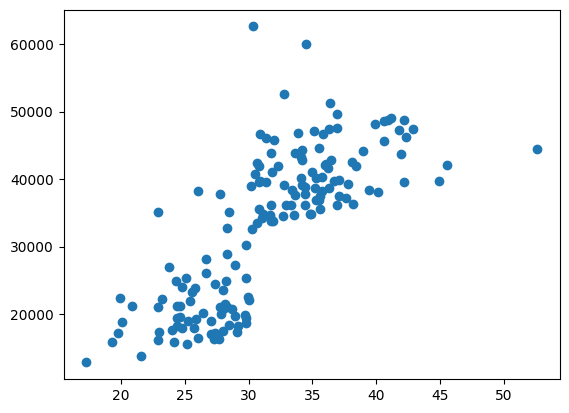

In [ ]:
#11 ANÁLISE GRÁFICA - AED
#Gráfico da relação entre IMC x Custo
plt.scatter(X, Y)
plt.show()


In [ ]:
#12 PEARSON
#Calculo do r (Pearson)
r = pearsonr(X, Y)
print(f'Coeficiente de correlação: {r}')

Coeficiente de correlação: PearsonRResult(statistic=0.7693553500239402, pvalue=2.290057897722594e-32)


In [ ]:
#13 MLS I
#Separar os conjuntos TREINAMENTO e TESTE (70% / 30%)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
#Dados de x (Features)
print(x_train)

[34.9   33.4   34.4   28.31  38.17  36.96  31.79  42.9   27.835 35.75
 38.94  34.2   26.07  35.53  30.685 28.3   27.1   23.98  30.    24.42
 36.955 35.625 29.8   35.09  30.36  37.07  34.105 35.3   31.35  37.8
 42.35  32.8   20.9   32.7   24.795 28.5   31.35  36.67  27.74  36.4
 31.68  30.8   33.63  22.895 31.13  31.73  34.1   41.14  32.015 29.7
 41.895 28.12  33.33  29.07  40.15  29.925 28.025 25.175 25.84  36.19
 32.9   41.8   27.3   22.99  28.975 36.3   45.54  28.5   40.92  33.535
 30.2   39.9   24.32  24.64  35.97  30.9   34.2   37.07  19.8   31.92
 35.5   28.025 25.41  29.15  27.36  31.73  42.13  25.3   52.58  19.3
 34.21  40.565 30.685 25.1   25.6   36.08  39.4   20.13  38.39  26.03
 28.    30.495 28.69  30.875 34.43  36.48  38.06  28.93  30.25  31.68
 34.485]


In [ ]:
print(x_test)

[28.31  26.695 35.75  34.96  29.81  36.3   37.62  27.8   30.78  29.83
 32.775 31.065 35.2   27.7   30.8   29.83  28.215 27.06  33.88  27.36
 35.3   21.565 24.795 17.29  23.21  34.8   24.42  25.9   26.695 19.95
 23.76  22.895 40.565 35.6   36.955 22.895 25.7   24.13  26.41  33.63
 35.86  31.825 44.88  42.13  32.3   24.605 24.4   34.39 ]


In [ ]:
#Dados de y (Target)
print(y_train)

[34828.654   38415.474   36197.699   28868.6639  36307.7983  49577.6624
 43813.8661  47462.894   20009.63365 40273.6455  44202.6536  42856.838
 38245.59327 36950.2567  42303.69215 21082.16    19040.876   17663.1442
 22144.032   21223.6758  36219.40545 37465.34375 25309.489   47055.5321
 62592.87309 39871.7043  43254.41795 36837.467   46130.5265  39241.442
 46151.1245  52590.82939 21195.818   34472.841   23967.38305 35147.52848
 39556.4945  39774.2763  20984.0936  51194.55914 34672.1472  41999.52
 37607.5277  35069.37452 34806.4677  36189.1017  40182.246   48970.2476
 45710.20785 19933.458   43753.33705 21472.4788  36124.5737  17352.6803
 38126.2465  22462.04375 17560.37975 15518.18025 23807.2406  41676.0811
 36085.219   47269.854   16232.847   17361.7661  27218.43725 38711.
 42112.2356  18310.742   48673.5588  34617.84065 38998.546   48173.361
 24869.8368  19515.5416  42124.5153  39727.614   39047.285   37484.4493
 17179.522   33750.2918  44585.45587 20773.62775 21978.6769  18246.4955


In [ ]:
print(y_test)

[32787.45859 26109.32905 38282.7495  41034.2214  19350.3689  47403.88
 37165.1638  37829.7242  39597.4072  18648.4217  39125.33225 34254.05335
 38709.176   16297.846   35491.64    30184.9367  24915.22085 17043.3414
 46889.2612  17178.6824  40103.89    13747.87235 17904.52705 12829.4551
 22218.1149  34779.615   19361.9988  19199.944   28101.33305 22412.6485
 26926.5144  21098.55405 45702.02235 35585.576   47496.49445 16138.76205
 17942.106   15817.9857  20149.3229  43921.1837  46599.1084  41097.16175
 39722.7462  48675.5177  41919.097   21259.37795 18259.216   38746.3551 ]


In [ ]:
#14 PRÉ PROCESSSANDO OS DADOS II
# Carregar os dados no modelo de ML
# Transformar os dados de treino e teste em arrays coluna
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
print(x_train)

[[34.9  ]
 [33.4  ]
 [34.4  ]
 [28.31 ]
 [38.17 ]
 [36.96 ]
 [31.79 ]
 [42.9  ]
 [27.835]
 [35.75 ]
 [38.94 ]
 [34.2  ]
 [26.07 ]
 [35.53 ]
 [30.685]
 [28.3  ]
 [27.1  ]
 [23.98 ]
 [30.   ]
 [24.42 ]
 [36.955]
 [35.625]
 [29.8  ]
 [35.09 ]
 [30.36 ]
 [37.07 ]
 [34.105]
 [35.3  ]
 [31.35 ]
 [37.8  ]
 [42.35 ]
 [32.8  ]
 [20.9  ]
 [32.7  ]
 [24.795]
 [28.5  ]
 [31.35 ]
 [36.67 ]
 [27.74 ]
 [36.4  ]
 [31.68 ]
 [30.8  ]
 [33.63 ]
 [22.895]
 [31.13 ]
 [31.73 ]
 [34.1  ]
 [41.14 ]
 [32.015]
 [29.7  ]
 [41.895]
 [28.12 ]
 [33.33 ]
 [29.07 ]
 [40.15 ]
 [29.925]
 [28.025]
 [25.175]
 [25.84 ]
 [36.19 ]
 [32.9  ]
 [41.8  ]
 [27.3  ]
 [22.99 ]
 [28.975]
 [36.3  ]
 [45.54 ]
 [28.5  ]
 [40.92 ]
 [33.535]
 [30.2  ]
 [39.9  ]
 [24.32 ]
 [24.64 ]
 [35.97 ]
 [30.9  ]
 [34.2  ]
 [37.07 ]
 [19.8  ]
 [31.92 ]
 [35.5  ]
 [28.025]
 [25.41 ]
 [29.15 ]
 [27.36 ]
 [31.73 ]
 [42.13 ]
 [25.3  ]
 [52.58 ]
 [19.3  ]
 [34.21 ]
 [40.565]
 [30.685]
 [25.1  ]
 [25.6  ]
 [36.08 ]
 [39.4  ]
 [20.13 ]
 [38.39 ]
 [26.03 ]


In [ ]:
print(y_train)

[[34828.654  ]
 [38415.474  ]
 [36197.699  ]
 [28868.6639 ]
 [36307.7983 ]
 [49577.6624 ]
 [43813.8661 ]
 [47462.894  ]
 [20009.63365]
 [40273.6455 ]
 [44202.6536 ]
 [42856.838  ]
 [38245.59327]
 [36950.2567 ]
 [42303.69215]
 [21082.16   ]
 [19040.876  ]
 [17663.1442 ]
 [22144.032  ]
 [21223.6758 ]
 [36219.40545]
 [37465.34375]
 [25309.489  ]
 [47055.5321 ]
 [62592.87309]
 [39871.7043 ]
 [43254.41795]
 [36837.467  ]
 [46130.5265 ]
 [39241.442  ]
 [46151.1245 ]
 [52590.82939]
 [21195.818  ]
 [34472.841  ]
 [23967.38305]
 [35147.52848]
 [39556.4945 ]
 [39774.2763 ]
 [20984.0936 ]
 [51194.55914]
 [34672.1472 ]
 [41999.52   ]
 [37607.5277 ]
 [35069.37452]
 [34806.4677 ]
 [36189.1017 ]
 [40182.246  ]
 [48970.2476 ]
 [45710.20785]
 [19933.458  ]
 [43753.33705]
 [21472.4788 ]
 [36124.5737 ]
 [17352.6803 ]
 [38126.2465 ]
 [22462.04375]
 [17560.37975]
 [15518.18025]
 [23807.2406 ]
 [41676.0811 ]
 [36085.219  ]
 [47269.854  ]
 [16232.847  ]
 [17361.7661 ]
 [27218.43725]
 [38711.     ]
 [42112.23

In [ ]:
print(x_test)

[[28.31 ]
 [26.695]
 [35.75 ]
 [34.96 ]
 [29.81 ]
 [36.3  ]
 [37.62 ]
 [27.8  ]
 [30.78 ]
 [29.83 ]
 [32.775]
 [31.065]
 [35.2  ]
 [27.7  ]
 [30.8  ]
 [29.83 ]
 [28.215]
 [27.06 ]
 [33.88 ]
 [27.36 ]
 [35.3  ]
 [21.565]
 [24.795]
 [17.29 ]
 [23.21 ]
 [34.8  ]
 [24.42 ]
 [25.9  ]
 [26.695]
 [19.95 ]
 [23.76 ]
 [22.895]
 [40.565]
 [35.6  ]
 [36.955]
 [22.895]
 [25.7  ]
 [24.13 ]
 [26.41 ]
 [33.63 ]
 [35.86 ]
 [31.825]
 [44.88 ]
 [42.13 ]
 [32.3  ]
 [24.605]
 [24.4  ]
 [34.39 ]]


In [ ]:
print(y_test)

[[32787.45859]
 [26109.32905]
 [38282.7495 ]
 [41034.2214 ]
 [19350.3689 ]
 [47403.88   ]
 [37165.1638 ]
 [37829.7242 ]
 [39597.4072 ]
 [18648.4217 ]
 [39125.33225]
 [34254.05335]
 [38709.176  ]
 [16297.846  ]
 [35491.64   ]
 [30184.9367 ]
 [24915.22085]
 [17043.3414 ]
 [46889.2612 ]
 [17178.6824 ]
 [40103.89   ]
 [13747.87235]
 [17904.52705]
 [12829.4551 ]
 [22218.1149 ]
 [34779.615  ]
 [19361.9988 ]
 [19199.944  ]
 [28101.33305]
 [22412.6485 ]
 [26926.5144 ]
 [21098.55405]
 [45702.02235]
 [35585.576  ]
 [47496.49445]
 [16138.76205]
 [17942.106  ]
 [15817.9857 ]
 [20149.3229 ]
 [43921.1837 ]
 [46599.1084 ]
 [41097.16175]
 [39722.7462 ]
 [48675.5177 ]
 [41919.097  ]
 [21259.37795]
 [18259.216  ]
 [38746.3551 ]]


In [ ]:
# 15 MLS
# Aplicação do Método de MLS (Regressão Linear)
# 15.1 Ajuste do MODELO
reg = LinearRegression()
reg.fit(x_train,y_train)
# 15.2 Predição com o MODELO (TESTE COM x_teste -> pred)
pred = reg.predict(x_test)
print(pred)


[[28918.41110004]
 [26701.55577986]
 [39131.04489701]
 [38046.638889  ]
 [30977.40984943]
 [39886.01110512]
 [41697.93000458]
 [28218.35152525]
 [32308.89570737]
 [31004.86316609]
 [35047.36404405]
 [32700.10546975]
 [38376.0786889 ]
 [28081.08494195]
 [32336.34902403]
 [31004.86316609]
 [28788.00784591]
 [27202.57880888]
 [36564.15978944]
 [27614.37855876]
 [38513.34527219]
 [19659.78005695]
 [24093.4906973 ]
 [13791.63362119]
 [21917.81535212]
 [37827.01235573]
 [23578.74100996]
 [25610.28644269]
 [26701.55577986]
 [17442.92473678]
 [22672.78156023]
 [21485.42561474]
 [45740.43088255]
 [38925.14502207]
 [40785.10722569]
 [21485.42561474]
 [25335.7532761 ]
 [23180.66791841]
 [26310.34601748]
 [36220.99333121]
 [39282.03813863]
 [33743.33150277]
 [51663.48395162]
 [47888.65291108]
 [34395.34777341]
 [23832.68418905]
 [23551.2876933 ]
 [37264.21936423]]


Text(0, 0.5, 'Gastos com Seguro (Dólares)')

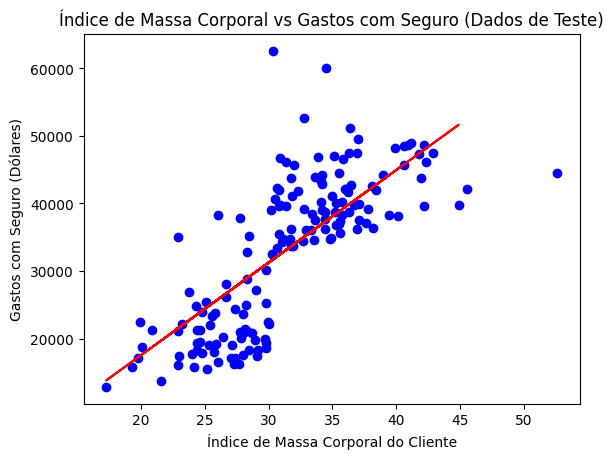

In [ ]:
#16 ANÁLISE GRÁFICA - Dados Experimentais x Modelo
plt.scatter(X, Y, color="blue")
plt.plot(x_test, pred, color="red")
plt.title("Índice de Massa Corporal vs Gastos com Seguro (Dados de Teste)")
plt.xlabel("Índice de Massa Corporal do Cliente")
plt.ylabel("Gastos com Seguro (Dólares)")

In [ ]:
#17 CÁLCULO DO R2 (AJUSTE LINEAR)
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r2: {r_squared}')

Coeficiente r2: 0.6871893267247464


In [ ]:
#18 DETERMINAÇÃO DO AJUSTE (ERRO MÉDIO)
print('MAE (Erro):', metrics.mean_absolute_error(y_test, pred))

MAE (Erro): 5118.9430089859425
